In [31]:
# import module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#load data
df_negara = pd.read_csv('Data_Negara_HELP.csv')

# data preparation
df_Negara = df_negara.set_index('Negara')
df = df_Negara.astype('float')
df

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Negara,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
Venezuela,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,2.47,13500.0
Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0


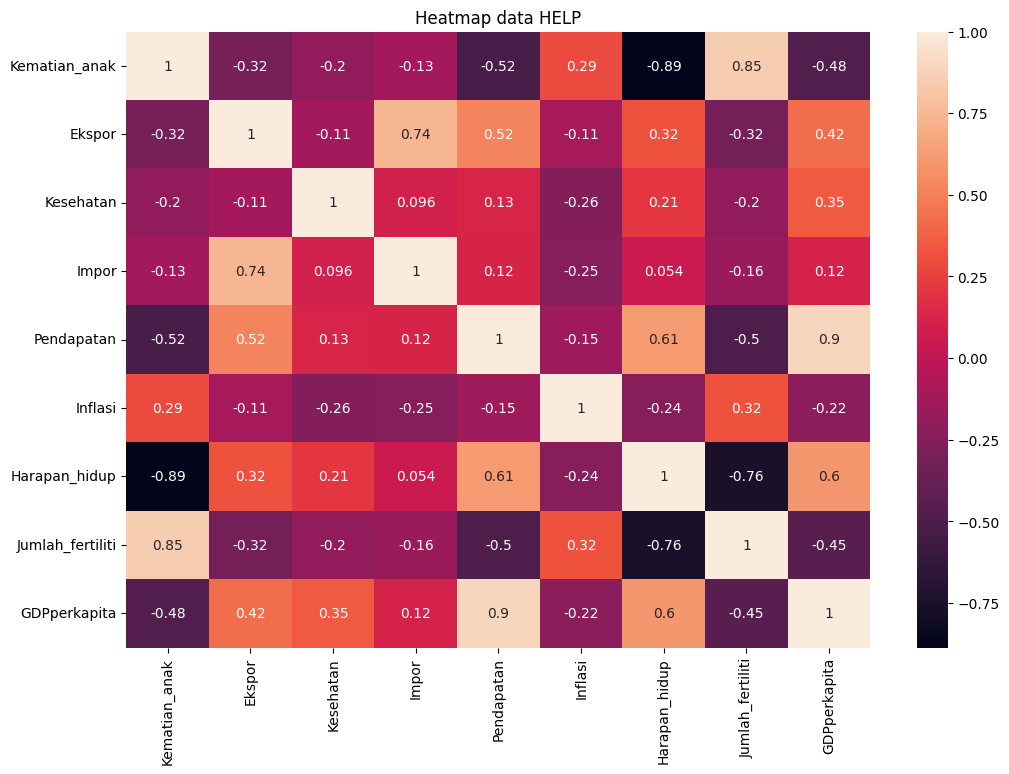

In [32]:
# heatmap korelasi
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap data HELP')
plt.show()

In [33]:
# cek data 
df.isnull().sum()

Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

<Axes: xlabel='Pendapatan'>

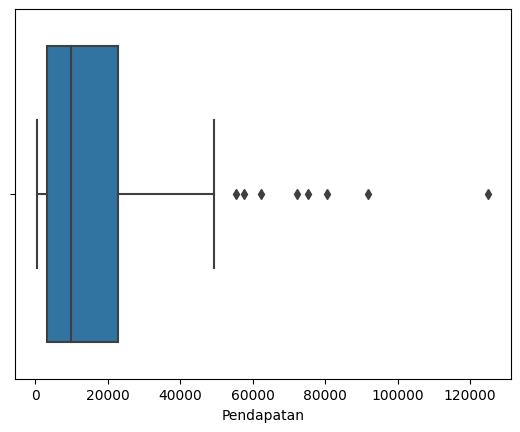

In [34]:
# cek outlier 
sns.boxplot(x = df_negara['Pendapatan'])

<Axes: xlabel='Kesehatan'>

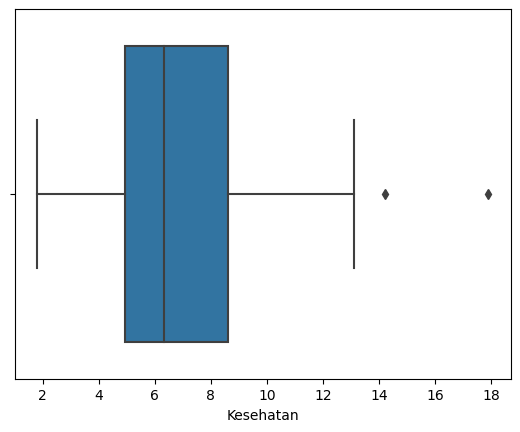

In [35]:
# cek outlier 
sns.boxplot(x = df_negara['Kesehatan'])

In [36]:
# Handling outliers dengan winsorize
from scipy.stats.mstats import winsorize

dfbaru =pd.DataFrame(data = df_negara, columns = ['Negara','Pendapatan', 'Kesehatan'])

dfbaru['Pendapatan'] = winsorize(dfbaru['Pendapatan'], limits =[0.05, 0.05])  
dfbaru['Kesehatan'] = winsorize(dfbaru['Kesehatan'], limits = [0.05, 0.05]) 

country = dfbaru.set_index('Negara')
country

,Pendapatan,Kesehatan
Negara,,
Afghanistan,1610,7.58
Albania,9930,6.55
Algeria,12900,4.17
Angola,5900,2.85
Antigua and Barbuda,19100,6.03
...,...,...
Vanuatu,2950,5.25
Venezuela,16500,4.91
Vietnam,4490,6.84


<Axes: xlabel='Pendapatan'>

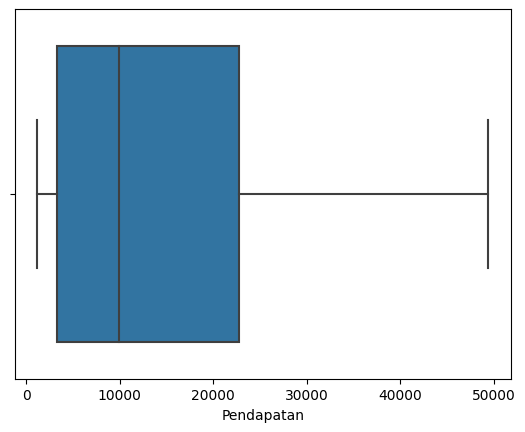

In [37]:
sns.boxplot(x='Pendapatan', data=country)

<Axes: xlabel='Kesehatan'>

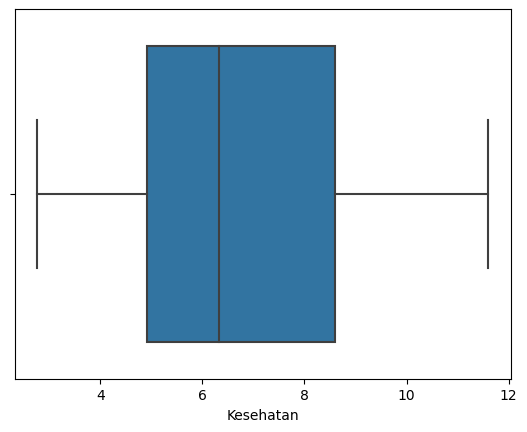

In [38]:
sns.boxplot(x='Kesehatan', data=country)

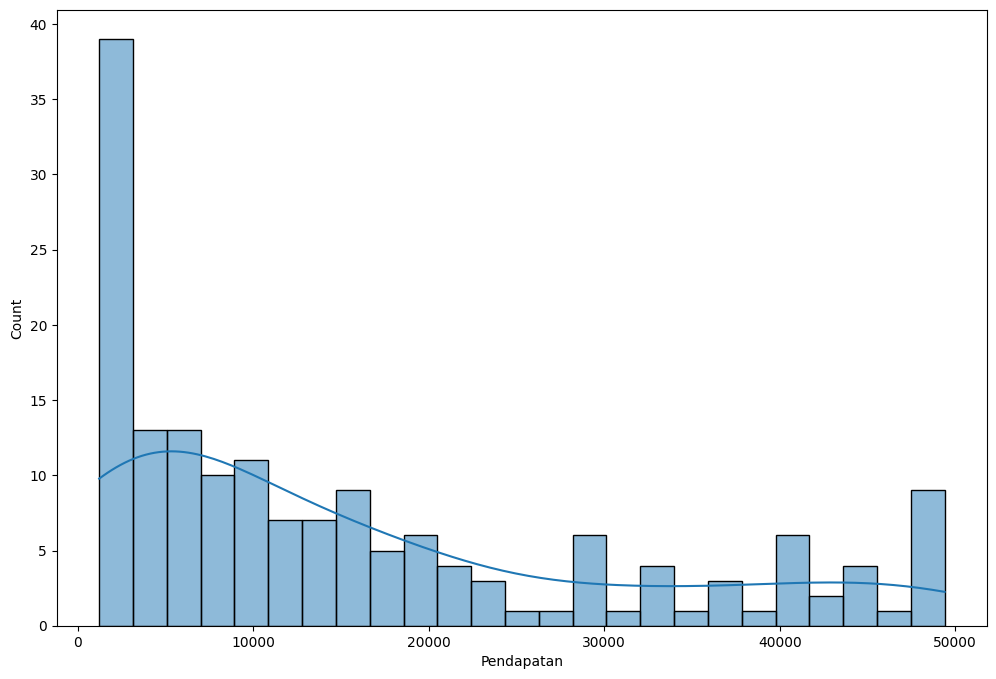

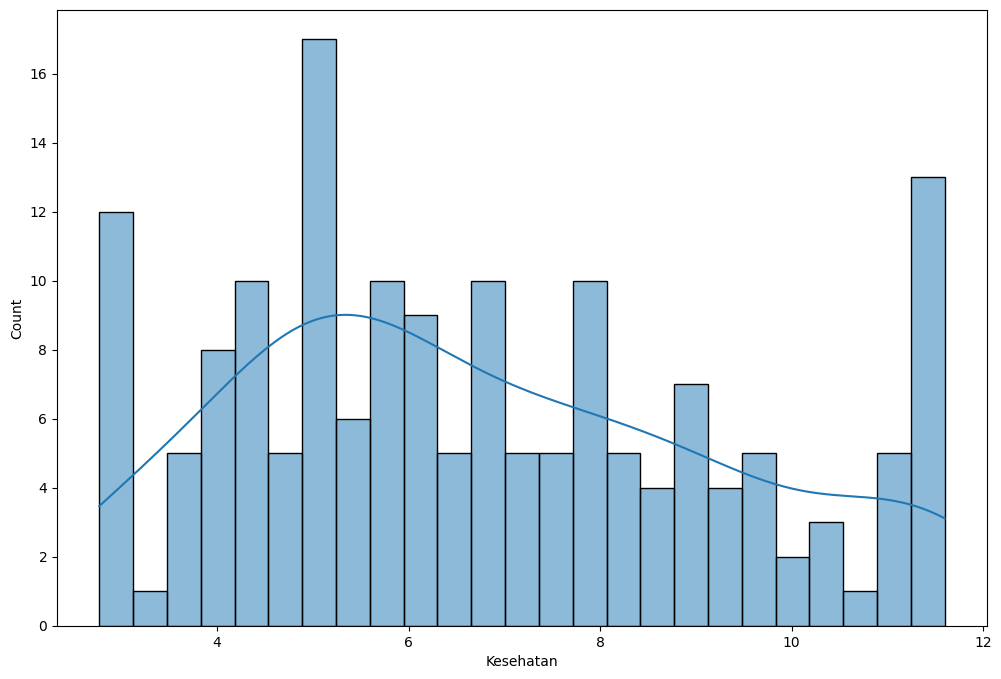

In [39]:
# Univariate analysis
fig, ax = plt.subplots(figsize = (12,8))
sns.histplot(country['Pendapatan'], bins = 25, kde = True)
plt.show()

# Univariate analysis
fig, ax = plt.subplots(figsize = (12,8))
sns.histplot(country['Kesehatan'], bins = 25, kde = True)
plt.show()

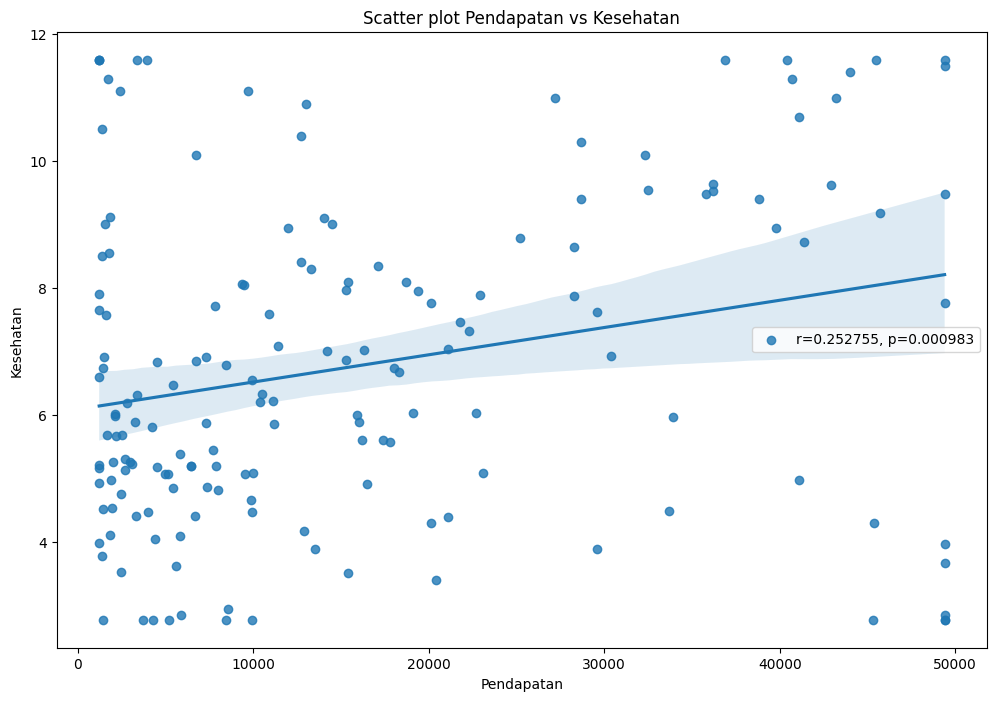

In [40]:
# Bivariate analysis
from scipy import stats

fig, ax = plt.subplots(figsize = (12,8))

sns.regplot(data = country, x = 'Pendapatan', y ='Kesehatan' )
#menghitung nilai regresi 
r, p = stats.pearsonr(country['Pendapatan'], country['Kesehatan'])

plt.title('Scatter plot Pendapatan vs Kesehatan')
plt.legend(['r={:f}, p={:f}'.format(r,p)])
plt.show()

C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default 

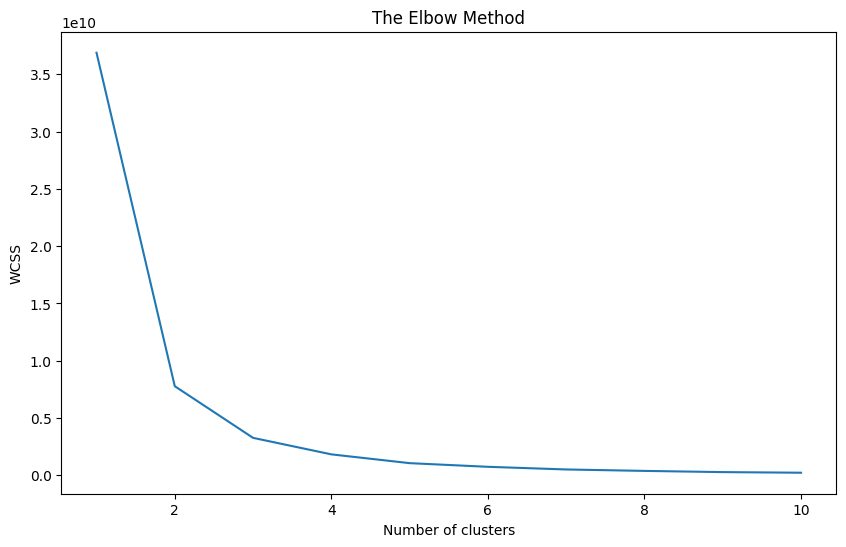

In [41]:
from sklearn.cluster import KMeans

WCSS = []

for i in range (1,11):
  kmeans = KMeans( n_clusters = i, init = 'k-means++', random_state = 40)
  kmeans.fit(country)
  WCSS.append(kmeans.inertia_)

plt.figure(figsize = (10,6))
plt.plot(range(1,11), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


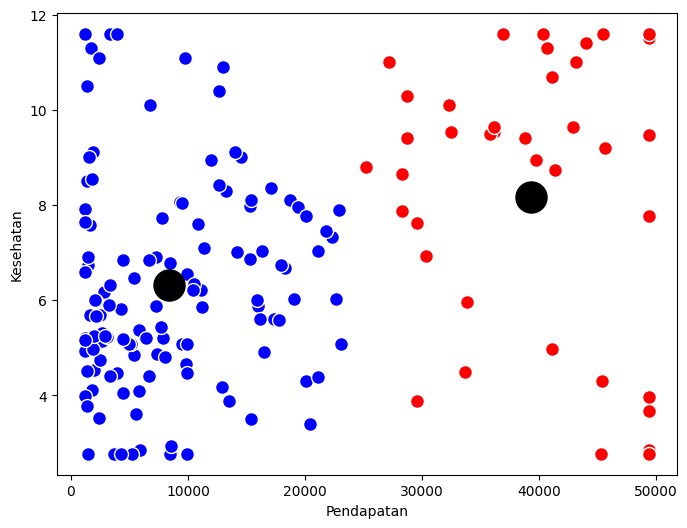

In [42]:
from tables.tests.common import ne
kmeans1 = KMeans(n_clusters = 2, random_state = 40).fit(country)
labels = kmeans1.labels_

df_baru = pd.DataFrame(data = country, columns = ['Pendapatan', 'Kesehatan'])
df_baru['label_kmeans1'] = labels

plt.figure(figsize = (8,6))
plt.scatter(df_baru.Pendapatan[df_baru.label_kmeans1 == 0], df_baru['Kesehatan'][df_baru.label_kmeans1 == 0], c = 'red', s = 100, edgecolor = 'w', linestyle = '-')
plt.scatter(df_baru.Pendapatan[df_baru.label_kmeans1 == 1], df_baru['Kesehatan'][df_baru.label_kmeans1 == 1], c = 'blue', s = 100, edgecolor = 'w', linestyle = '-')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'k', s = 500)
plt.xlabel('Pendapatan')
plt.ylabel('Kesehatan')
plt.show()

In [43]:
kmeans2 = KMeans( n_clusters = 4, init = 'k-means++', random_state = 40).fit(df_baru)
kmeans2.labels_

C:\Users\ACER\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 2, 0, 2, 2, 0, 3, 3, 2, 2, 3, 0, 2, 2, 3, 0, 0, 0, 0, 0, 2,
       2, 3, 2, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       3, 2, 0, 0, 0, 1, 0, 2, 0, 3, 1, 2, 0, 0, 3, 0, 1, 2, 0, 0, 0, 0,
       0, 2, 3, 0, 0, 2, 2, 3, 1, 1, 0, 1, 0, 2, 0, 0, 3, 0, 0, 2, 2, 0,
       0, 1, 2, 3, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       3, 1, 0, 0, 3, 3, 0, 2, 0, 0, 0, 2, 1, 3, 2, 2, 0, 0, 3, 0, 2, 2,
       0, 3, 1, 1, 0, 2, 1, 1, 0, 0, 0, 2, 3, 3, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 3, 1, 3, 2, 0, 0, 2, 0, 0, 0])

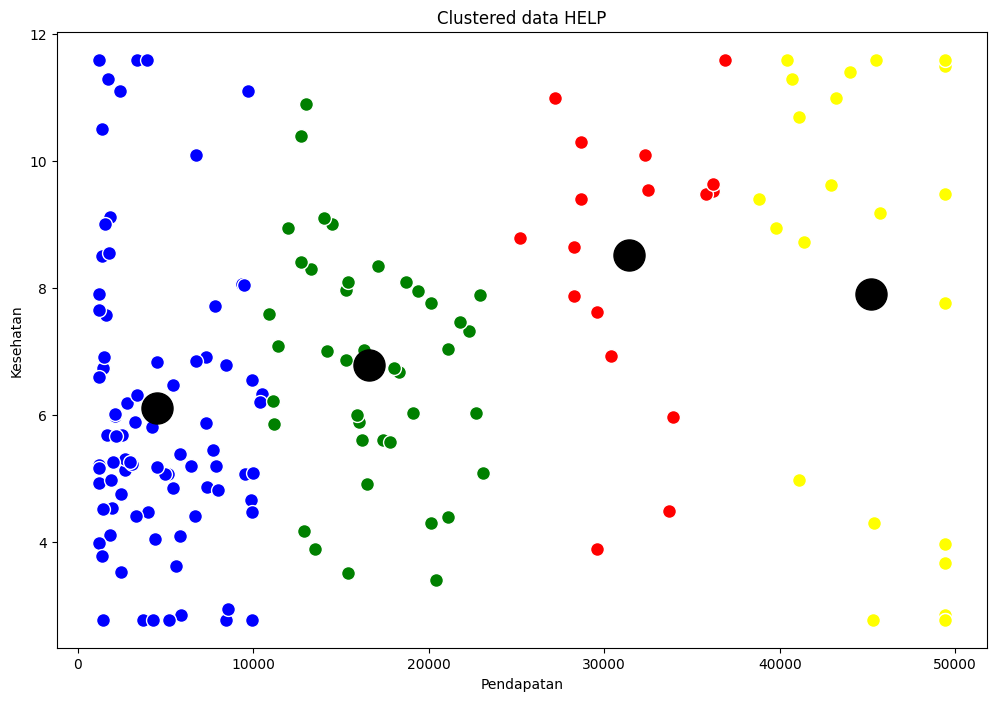

In [44]:
# implementasi hsl training ke data HELP
labels2 = kmeans2.labels_
df_baru['label_kmeans2'] = labels2

plt.figure(figsize = (12,8))
plt.scatter(df_baru.Pendapatan[df_baru.label_kmeans2 == 0], df_baru['Kesehatan'][df_baru.label_kmeans2 == 0], c = 'blue', s = 100, edgecolor = 'w', linestyle = '-')
plt.scatter(df_baru.Pendapatan[df_baru.label_kmeans2 == 1], df_baru['Kesehatan'][df_baru.label_kmeans2 == 1], c = 'red', s = 100, edgecolor = 'w', linestyle = '-')
plt.scatter(df_baru.Pendapatan[df_baru.label_kmeans2 == 2], df_baru['Kesehatan'][df_baru.label_kmeans2 == 2], c = 'green', s = 100, edgecolor = 'w', linestyle = '-')
plt.scatter(df_baru.Pendapatan[df_baru.label_kmeans2 == 3], df_baru['Kesehatan'][df_baru.label_kmeans2 == 3], c = 'yellow', s = 100, edgecolor = 'w', linestyle = '-')

centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'k', s = 500)
plt.xlabel('Pendapatan')
plt.ylabel('Kesehatan')
plt.title('Clustered data HELP')
plt.show()

In [45]:
import dataframe_image as dfi
# buat dataframe utk matriks negara yang butuh bantuan
bantuan = pd.DataFrame(data = df_baru, columns = ['Pendapatan', 'Kesehatan', 'label_kmeans1', 'label_kmeans2'])
bantuan['Pendapatan_asli'] = df['Pendapatan'] 
bantuan['Kesehatan_asli'] = df['Kesehatan']

#split data utk memilih cluster dimana pendapatan dan kesehatan rendah
Pendapatanrendah = bantuan['label_kmeans2'] == 0
Krendah = bantuan['label_kmeans2'] == 0
bantuan_prioritas = bantuan[(Pendapatanrendah) & (Krendah)]

# filtering data 
Plow = bantuan_prioritas['Pendapatan_asli'] < bantuan_prioritas['Pendapatan_asli'].mean()
Klow = bantuan_prioritas['Kesehatan_asli'] < bantuan_prioritas['Kesehatan_asli'].mean()
PRIORITAS = bantuan_prioritas[(Plow) & (Klow)]

# Sortir data untuk menampilkan negara yg memiliki pendapatan dan kesehatan terkecil
HELP_sort = PRIORITAS.sort_values(by = ['Pendapatan_asli', 'Kesehatan_asli'], ascending = True)
#dfi.export(HELP_sort.iloc[:, 4:6].head(10), 'HELP.jpg', table_conversion= 'matplotlib')
HELP_sort

,Pendapatan,Kesehatan,label_kmeans1,label_kmeans2,Pendapatan_asli,Kesehatan_asli
Negara,,,,,,
Niger,1210,5.16,1,0,814.0,5.16
Central African Republic,1210,3.98,1,0,888.0,3.98
Mozambique,1210,5.21,1,0,918.0,5.21
Guinea,1210,4.93,1,0,1190.0,4.93
Madagascar,1390,3.77,1,0,1390.0,3.77
Comoros,1410,4.51,1,0,1410.0,4.51
Eritrea,1420,2.77,1,0,1420.0,2.66
Gambia,1660,5.69,1,0,1660.0,5.69
Benin,1820,4.10,1,0,1820.0,4.10
